In [322]:
import pandas as pd 
import numpy as np
import yfinance as yf 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 1000)

In [323]:
# List of securities 
securities = [ 
    # Equities 
    'SPY', 
    'QQQ',
    'IWM',
    'EZU',
    'FEZ',
    'EWG',
    'EWU',
    'EWJ',
    'MCHI',
    'TSLA',

    # Bonds 
    'TLT',
    'IEF',
    'SHY',
    'LQD',
    'HYG',
    'BNDX',
    'TIP',
    'EMB',
    

    # Commodities    
    "USO",
    "UNG",
    "GLD",
    "CPER",
    "SLV",
    "DBA",
    "WEAT",
    "CORN",
    'SOYB',

    # FX 
    'UUP',
    'FXE',
    'FXY',
    'FXB',
    'FXF',
    'FXC',
    'FXA',
    
    # Crypto 
    'GBTC']

In [324]:
# Setting the start and end date 
endDate = datetime.today()
startDate = endDate - timedelta(days=50*365)
print(startDate)

1974-08-01 16:53:48.703193


In [325]:
# Downloading stock data to df
close_df = pd.DataFrame()
for i in securities:
    data = yf.download(i, start=startDate, end=endDate)
    close_df[i] = data["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [326]:
# Calculation for bollinger bands 
def bollinger_bands(df):
    for i in df.columns:
        df[f'{i}_bollinger_middle'] = df[f'{i}'].rolling(window=20).mean()
        standard_dev = df[f'{i}'].rolling(window=20).std()
        df[f'{i}_bollinger_upper'] = df[f'{i}_bollinger_middle'] + 2*standard_dev
        df[f'{i}_bollinger_lower'] = df[f'{i}_bollinger_middle']- 2*standard_dev
    return df

In [327]:
# Defining the trading signal 
# Buy when price is below lower bollinger band
# Sell when price is above upper bollinger band 
def trading_signal(df, ticker):
    df[f'{ticker} Buy'] = np.where((df[f'{ticker}'] <= df[f"{ticker}_bollinger_lower"]), df[f'{ticker}'],np.nan) 
    df[f'{ticker} Sell'] = np.where((df[f'{ticker}'] >= df[f"{ticker}_bollinger_upper"]), df[f'{ticker}'],np.nan)
    return df

In [ ]:
# Calculating the bollinger bands for all securities 
bollinger_bands(close_df)

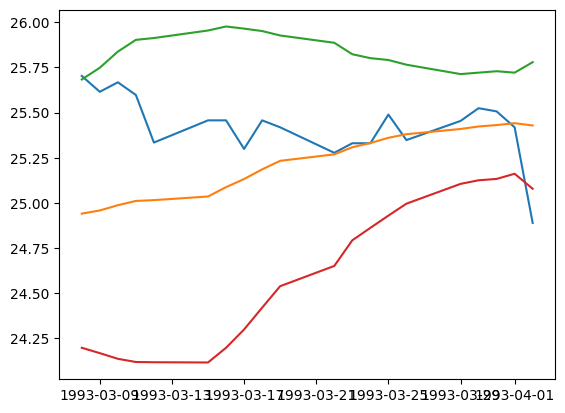

In [329]:
# Plotting the price and bollinger bands of SPY 
plt.plot(close_df[['SPY', 'SPY_bollinger_middle', 'SPY_bollinger_upper','SPY_bollinger_lower']][25:45])
plt.show()

In [ ]:
# Running the trading signal for each security 
for i in securities:
    trading_signal(close_df,i)

In [331]:
# New dataframe to view only the buy, sell signal's 
signal_df = close_df.iloc[:,140:]

In [332]:
# Seeing how many times our signal isn't executing 
# to better understand the strategy 
signal_df.isna().sum()

SPY Buy      7561
SPY Sell     7552
QQQ Buy      7760
QQQ Sell     7720
IWM Buy      7615
             ... 
FXC Sell     7718
FXA Buy      7706
FXA Sell     7727
GBTC Buy     7829
GBTC Sell    7722
Length: 70, dtype: int64

In [333]:
# Dropping unnecessary rows 
signal_df=signal_df.dropna(how='all')
signal_df

,SPY Buy,SPY Sell,QQQ Buy,QQQ Sell,IWM Buy,IWM Sell,EZU Buy,EZU Sell,FEZ Buy,FEZ Sell,EWG Buy,EWG Sell,EWU Buy,EWU Sell,EWJ Buy,EWJ Sell,MCHI Buy,MCHI Sell,TSLA Buy,TSLA Sell,TLT Buy,TLT Sell,IEF Buy,IEF Sell,SHY Buy,SHY Sell,LQD Buy,LQD Sell,HYG Buy,HYG Sell,BNDX Buy,BNDX Sell,TIP Buy,TIP Sell,EMB Buy,EMB Sell,USO Buy,USO Sell,UNG Buy,UNG Sell,GLD Buy,GLD Sell,CPER Buy,CPER Sell,SLV Buy,SLV Sell,DBA Buy,DBA Sell,WEAT Buy,WEAT Sell,CORN Buy,CORN Sell,SOYB Buy,SOYB Sell,UUP Buy,UUP Sell,FXE Buy,FXE Sell,FXY Buy,FXY Sell,FXB Buy,FXB Sell,FXF Buy,FXF Sell,FXC Buy,FXC Sell,FXA Buy,FXA Sell,GBTC Buy,GBTC Sell
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1993-03-08,NaN,25.702379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-04-02,24.888874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-04-05,25.012356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-04-06,24.941790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-04-23,24.694855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15,NaN,NaN,NaN,NaN,NaN,217.190002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.959999,NaN,NaN,NaN,77.989998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,22.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-16,NaN,NaN,NaN,NaN,NaN,224.600006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.290001,NaN,49.220001,NaN,107.769997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.289993,NaN,NaN,NaN,NaN,NaN,NaN,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-17,NaN,NaN,NaN,NaN,NaN,222.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.610001,NaN,NaN,NaN,NaN,59.25,NaN,NaN,NaN,100.650002,NaN,NaN,NaN,NaN,NaN,NaN
